In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [3]:
# 1. Read image
in_dir = "../data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [4]:
# 2. Print the shape of the image
print(im_org.shape)

(512, 512)


In [5]:
# 3. Check pixel type
print(im_org.dtype)

uint8


/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3611843782.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3611843782.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


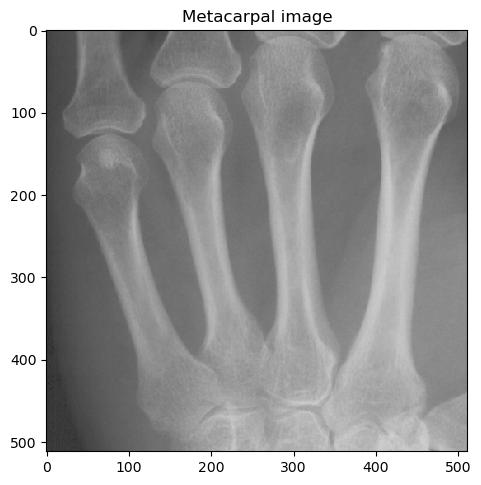

In [6]:
# 4. display image
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3187119062.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, cmap='jet')
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3187119062.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


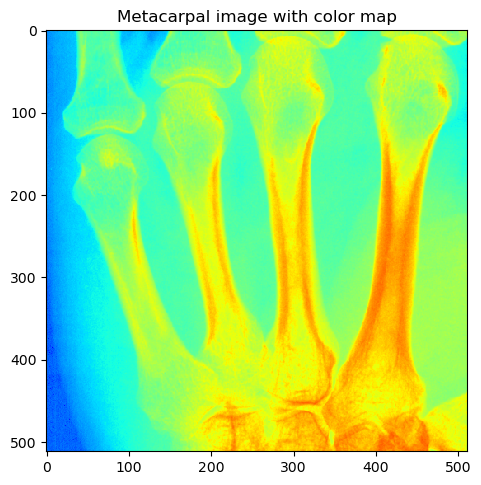

In [7]:
# 5. display using color map
io.imshow(im_org, cmap='jet')
plt.title('Metacarpal image with color map')
io.show()

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/2613046590.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, cmap='cubehelix')
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/2613046590.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


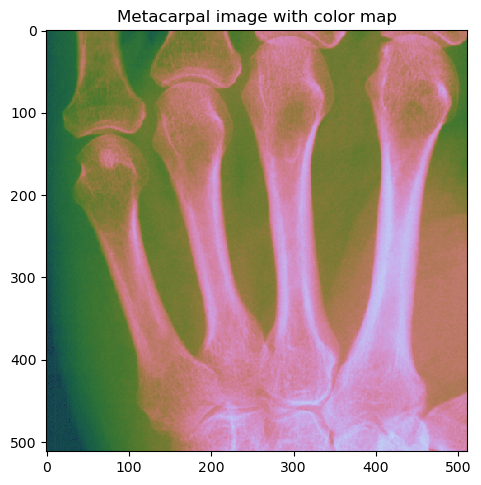

In [8]:
# 6. different color maps cool, hot, pink, copper, coolwarm, cubehelix, and terrain.
io.imshow(im_org, cmap='cubehelix')
plt.title('Metacarpal image with color map')
io.show()

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/1544018869.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/1544018869.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


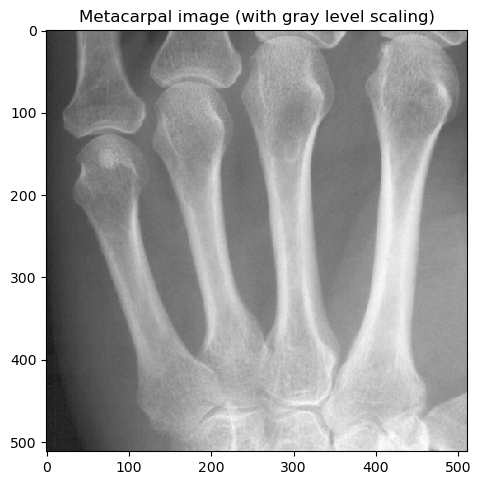

In [9]:
# 7. Try to find a way to automatically scale the visualization, 
# so the pixel with the lowest value in the image is shown as black 
# and the pixel with the highest value in the image is shown as white
io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
plt.title('Metacarpal image (with gray level scaling)')
io.show()

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/23811154.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


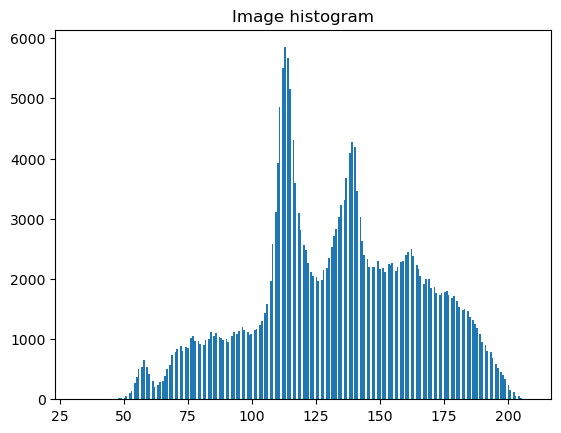

In [10]:
# 8. Compute and visualise the histogram of the image:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

Max count: 5848.0 in bin: 112.4375


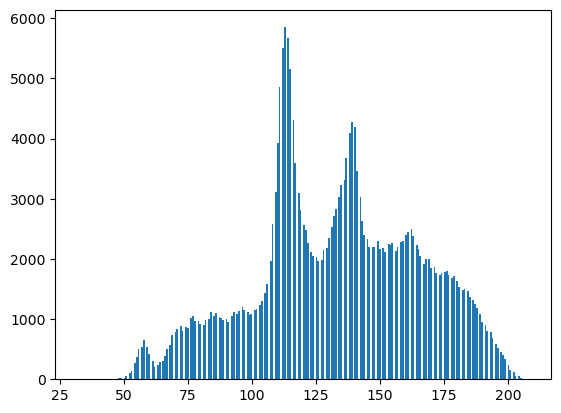

In [11]:
# 9. Use the histogram function to find the most common range of 
# intensities? (hint: you can use the list functions max and argmax)
counts, bins, _ = plt.hist(im_org.ravel(), bins=256)
max_count = counts.max()
max_bin = bins[counts.argmax()]
print(f'Max count: {max_count} in bin: {max_bin}')

In [12]:
# 10. What is the pixel value at (r, c) = (110, 90) ?
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3189654741.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3189654741.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


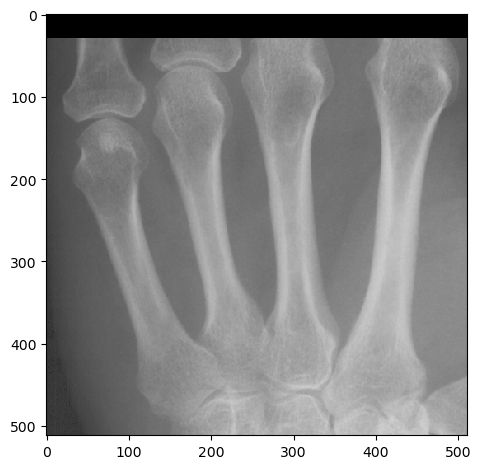

In [13]:
# 11. What does this operation do?
im_org[:30] = 0
io.imshow(im_org)
io.show()
# It sets the first 30 rows of the image to black (pixel value 0).

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/2424742696.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mask)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/2424742696.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


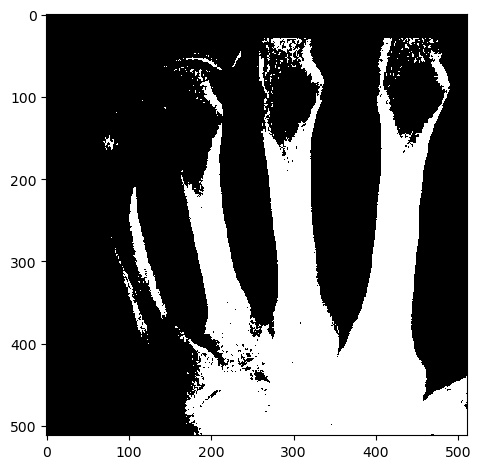

In [14]:
# 12. Where are the values 1 and where are they 0?
mask = im_org > 150
io.imshow(mask)
io.show()
# The values 1 are where the original image is greater than 150, and 0 otherwise.

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3295750986.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3295750986.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


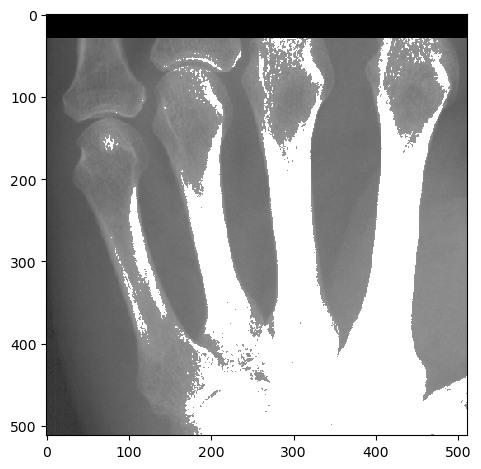

In [15]:
# 13. What does this piece of code do?
im_org[mask] = 255
io.imshow(im_org)
io.show()
# This sets all pixels in the original image that are greater than 150 to 255 (white).

In [16]:
# 14. Read the image and print the image dimensions and its pixel type. How many rows and columns do the image have?
dean = io.imread('../data/ardeche.jpg')
print(dean.shape)
print(dean.dtype)
print("Rows:", dean.shape[0])
print("Columns:", dean.shape[1])


(600, 800, 3)
uint8
Rows: 600
Columns: 800


In [17]:
# 15. What are the (R, G, B) pixel values at (r, c) = (110, 90)?
print("R:", dean[110, 90, 0])
print("G:", dean[110, 90, 1])
print("B:", dean[110, 90, 2])


R: 119
G: 178
B: 238


/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/1345532986.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dean)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/1345532986.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


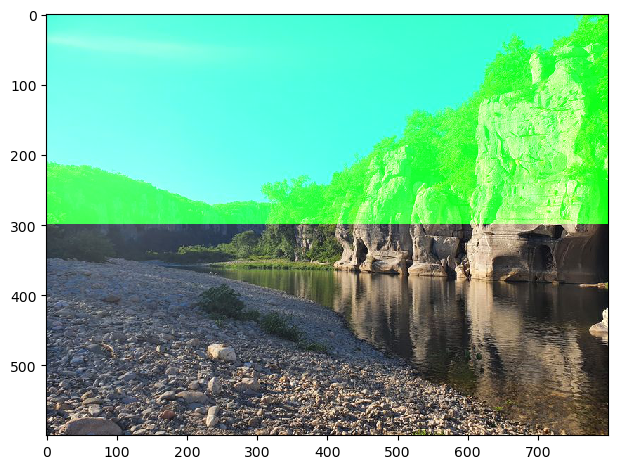

In [18]:
# 16. Try to use NumPy slicing to color the upper half of the photo green.
dean[:dean.shape[0]//2, :, 1] = 255
io.imshow(dean)
io.show()

In [19]:
# 17. Start by reading the image and examine the size of it.
myImage = io.imread('../data/myImage.jpeg')
print(myImage.shape)
print(myImage.dtype)
print("Rows:", myImage.shape[0])
print("Columns:", myImage.shape[1])


(188, 269, 3)
uint8
Rows: 188
Columns: 269


/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/557672422.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image_rescaled)


float64


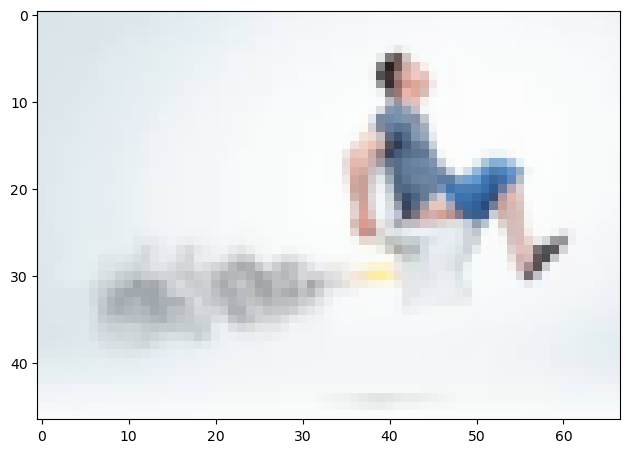

In [20]:
# 18. What is the type of the pixels after rescaling? Try to show the image and inspect the pixel values. Are they still in the range of [0, 255]?
image_rescaled = rescale(myImage, 0.25, anti_aliasing=True, channel_axis=2)
io.imshow(image_rescaled)
print(image_rescaled.dtype)
# it is now a float64 instead of uint8

In [21]:
# 19. Try to find a way to automatically scale your image so the resulting width (number of columns) is always equal to 400, no matter the size of the input image?
scale_factor = 400 / myImage.shape[1]
image_resized = resize(myImage, (400, myImage.shape[1] * scale_factor), anti_aliasing=True)
print(image_resized.shape)

(400, 400, 3)


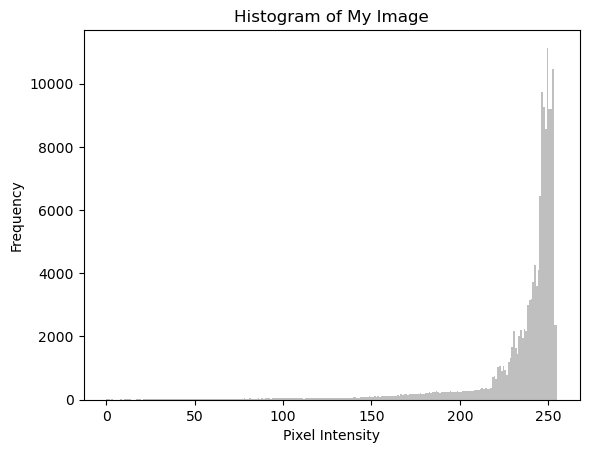

In [22]:
# 19(2). Compute and show the histogram of you own image.
plt.hist(myImage.ravel(), bins=256, color='gray', alpha=0.5)
plt.title("Histogram of My Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


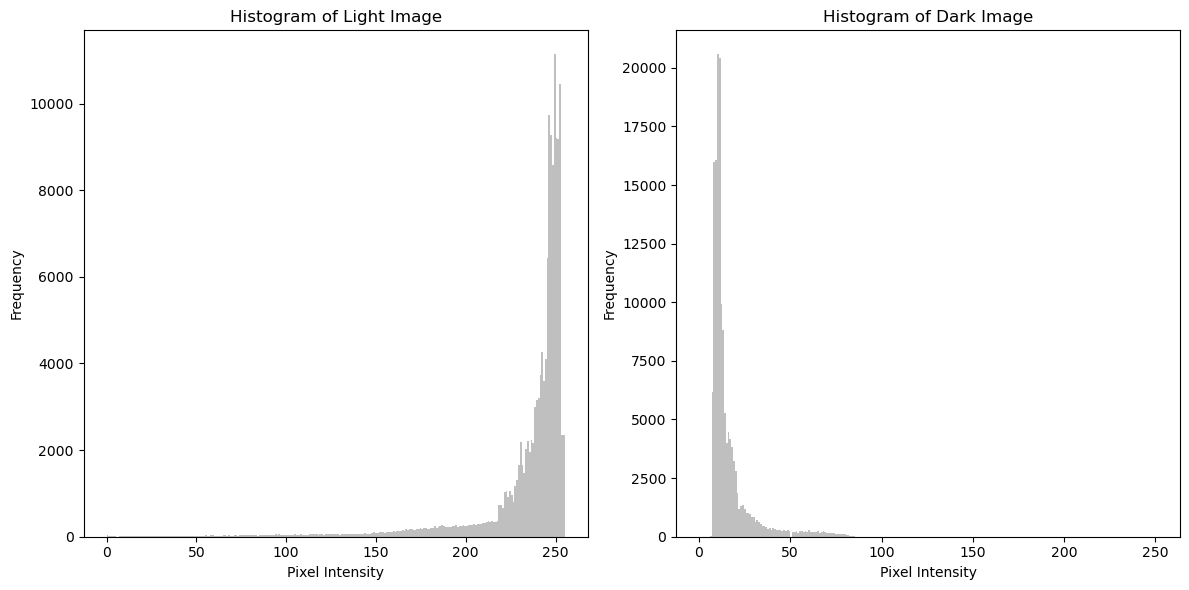

In [24]:
# 20. Take an image that is very dark and another very light image. Compute and visualise the histograms for the two images. Explain the difference between the two.
light_image = io.imread('../data/myImage.jpeg')
dark_image = io.imread('../data/dark.jpeg')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(light_image.ravel(), bins=256, color='gray', alpha=0.5)
plt.title("Histogram of Light Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(dark_image.ravel(), bins=256, color='gray', alpha=0.5)
plt.title("Histogram of Dark Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


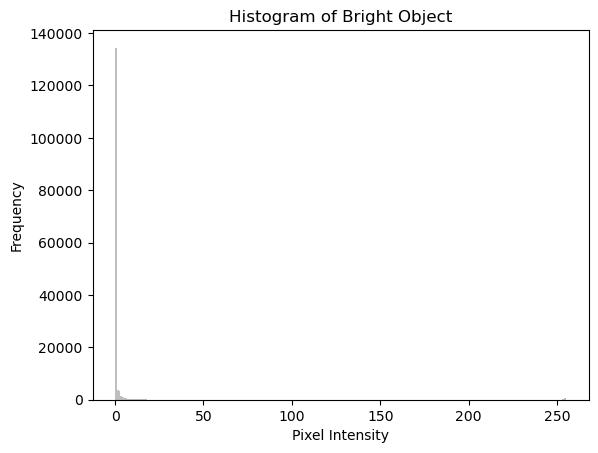

In [25]:
# 21. Take an image with a bright object on a dark background. Compute and visualise the histograms for the image. 
# Can you recognise the object and the background in the histogram?
brightObject = io.imread('../data/brightObject.jpeg')

plt.hist(brightObject.ravel(), bins=256, color='gray', alpha=0.5)
plt.title("Histogram of Bright Object")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


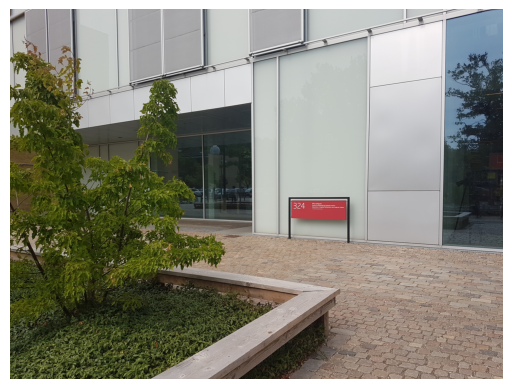

In [26]:
# 22. Start by reading and showing the DTUSign1.jpg image.
DTUSign1 = io.imread('../data/DTUSign1.jpg')
plt.imshow(DTUSign1)
plt.axis('off')
plt.show()

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3936164903.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(r_comp)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3936164903.py:7: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


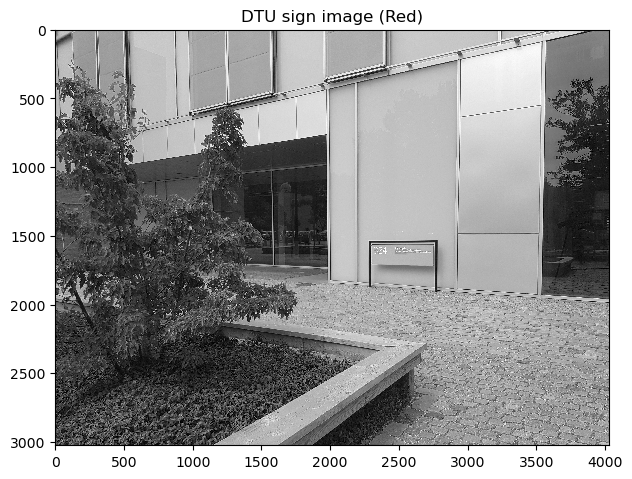

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3936164903.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(g_comp)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3936164903.py:12: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


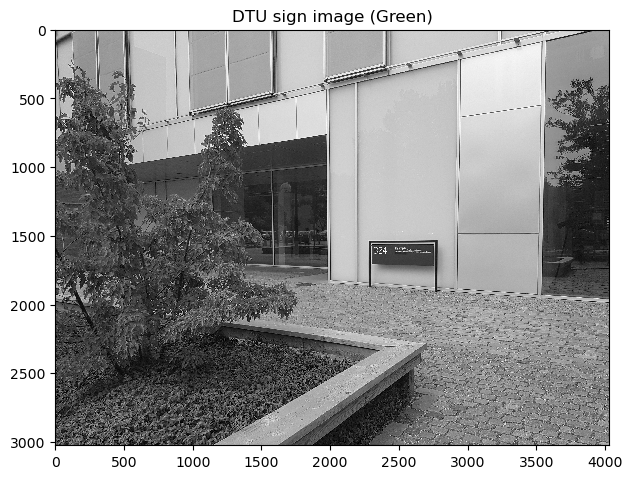

/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3936164903.py:15: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(b_comp)
/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/3936164903.py:17: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


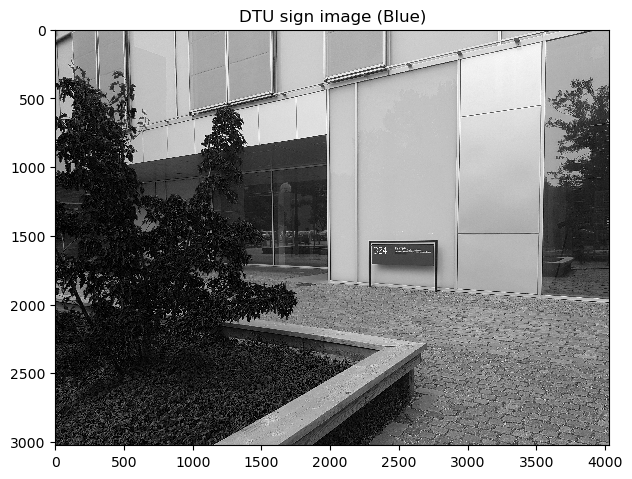

In [ ]:
# 23.  Visualize the R, G, and B components individually. 
# Why does the DTU Compute sign look bright on the R channel image and dark on the G and B channels? 
# Why do the walls of the building look bright in all channels?
r_comp = DTUSign1[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

g_comp = DTUSign1[:, :, 1]
io.imshow(g_comp)
plt.title('DTU sign image (Green)')
io.show()

b_comp = DTUSign1[:, :, 2]
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')
io.show()
# The DTU Compute sign appears bright in the red channel because it contains red pixels, 
# while it appears dark in the green and blue channels due to the lack of those colors in the sign. 
# The walls of the building are bright in all channels because they reflect light evenly across the spectrum.

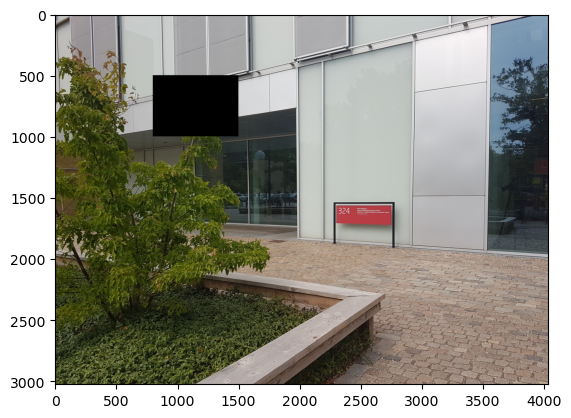

In [30]:
# 24. Start by reading and showing the DTUSign1.jpg image.
DTUSign1 = io.imread('../data/DTUSign1.jpg')
DTUSign1[500:1000, 800:1500, :] = 0

# 25. Show the image again and save it to disk as DTUSign1-marked.jpg using the io.imsave function.
# Try to save the image using different image formats like for example PNG.
plt.imshow(DTUSign1)
io.imsave('../data/DTUSign1-marked.jpg', DTUSign1)
io.imsave('../data/DTUSign1-marked.png', DTUSign1)


In [38]:
# 26 Try to create a blue rectangle around the DTU Compute sign and save the resulting image.
theSign = io.imread('../data/DTUSign1.jpg')
theSign[1500:1800, 2250:2800, 2] = 255
io.imsave('../data/DTUSign1-marked-sign.jpg', theSign)


/var/folders/88/jkd1q3n525n9kd732z874nq00000gn/T/ipykernel_29367/1072842732.py:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_rgb)


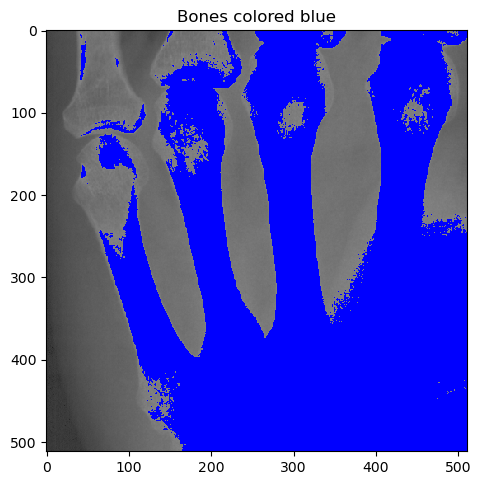

In [46]:
# 27. Try to automatically create an image based on metacarpals.png where the bones are colored blue. 
# You should use color.gray2rgb and pixel masks.
im = io.imread('../data/metacarpals.png')
im_rgb = color.gray2rgb(im)

# Create a mask for the bones (adjust threshold as needed)
mask = im > 130

# Set blue channel to 255, red and green to 0 where mask is True
im_rgb[mask, 0] = 0   # Red channel
im_rgb[mask, 1] = 0   # Green channel
im_rgb[mask, 2] = 255 # Blue channel

io.imshow(im_rgb)
plt.title('Bones colored blue')
plt.show()